# Download the MNIST Dataset and Reshape the Data

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

# X_train is 60,000 28x28 images
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape 28x28 images to 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# one hot encode the digit labels
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

# Define Parameters
* <code>input_size</code>: size of the input (i.e. images which are 784 pixels) <br>
* <code>batch_size</code>: mini batch size <br>
* <code>hidden_neurons</code>: number of hidden neurons <br>
* <code>epochs</code>: the number times that the learning algorithm will work through the entire training dataset

In [2]:
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 100

# Define the Model
* <code>Sequential</code>: Each layer serves as an input to the next <br>
* <code>Dense</code>: In Keras, means fully-connected layer <br>

In [3]:
model = Sequential([
 Dense(hidden_neurons, input_dim=input_size),
 Activation('sigmoid'),
 Dense(classes),
 Activation('softmax')
])

model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')

# Train the Model

In [4]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
verbose=1)

Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 0.9167 - accuracy: 0.7717
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.8831
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3934 - accuracy: 0.8993
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.9074
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.9151
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2965 - accuracy: 0.9200
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2785 - accuracy: 0.9240
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9276
Epoch 9/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.9305
Epoch 10/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2451 - accura

600/600 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9779
Epoch 82/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9784
Epoch 83/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9780
Epoch 84/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9786
Epoch 85/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9783
Epoch 86/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9794
Epoch 87/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9797
Epoch 88/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9797
Epoch 89/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9803
Epoch 90/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 

# Test the Model

In [5]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.1241 - accuracy: 0.9620
Test accuracy: 0.9620000123977661


# Visualize the Weights of the Hidden Layer
Here we aggregate the images of all neurons in a single figure that represents a composite of all neurons. <br>
There are 100 hiden neurons so the composite figure's shape is 10x10.

In [6]:
weights = model.layers[0].get_weights()

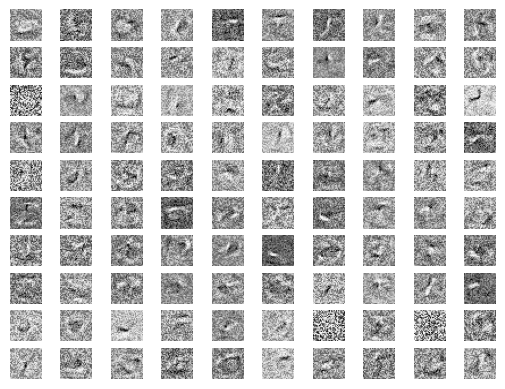

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()
w = weights[0].T
for neuron in range(hidden_neurons):
    ax = fig.add_subplot(10, 10, neuron + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)
plt.savefig("neuron_images.png", dpi=300)
plt.show()